# Corrélation de Spearman vs corrélation de Pearson

Cheryl Kouadio  
2025-02-07

# Corrélation de Spearman vs corrélation de Pearson

La corrélation de Spearman est une mesure de corrélation non
paramétrique qui permet de mesurer la relation monotone entre deux
variables. Elle est souvent utilisée pour mesurer la dépendance entre
les variables aléatoires. La corrélation de Spearman est basée sur les
rangs des observations et est moins sensible aux valeurs extrêmes que la
corrélation de Pearson. Elle est donc plus robuste et plus adaptée pour
mesurer la dépendance entre les variables aléatoires.

La corrélation de Pearson, quant à elle, ne permet de comparer les
dépendances **linéaires** des variables. De plus, elle ne permet de
comparer les corrélation que lorsque les variables aléatoires sont
normales. En effet, soit ($X_1,X_2,X_3$), si
$\rho(X_1,X_2) > \rho(X_1,X_3)$, cela ne veut dire que la corrélation
entre $X_1$ et $X_2$ est plus forte que celle entre $X_1$ et $X_3$ que
si ces variables sont gaussiennes.

Nous verrons dans la suite de ce document que la corrélation de Spearman
est plus adaptée pour mesurer la dépendance entre les variables
aléatoires, car elle est une **mesure de concordance**. De ce fait, elle
est définit par une copule. Il n’en est pas ainsi pour la corrélation de
Pearson.

### Qu’est ce qu’une mesure de concordance ?

Une mesure de concordance est une mesure qui permet de quantifier la
relation entre deux variables aléatoires. Cinq propriétés sont
généralement attribuées à une mesure de concordance :

-   **Symétrie** : la mesure de concordance entre X et Y est la même que
    celle entre Y et X.

-   **Normalisation** : la mesure de concordance est comprise entre -1
    et 1.

-   $\delta(X_1, X_2) = 1 \Leftrightarrow (X_1,X_2) \overset{\mathcal{L}}{=}  \left( F_1^{-1}(U),F_2^{-1}(U) \right)$

-   $\delta(X_1, X_2) = -1 \Leftrightarrow (X_1,X_2) \overset{\mathcal{L}}{=}  \left( F_1^{-1}(U),F_2^{-1}(1-U) \right)$

-   $\delta(f(X_1), X_2) = \delta(X_1, X_2)$ si $f$ est croissante;
    $\delta(f(X_1), X_2) = -\delta(X_1, X_2)$ si $f$ est décroissante.

En raison des propriétés 3 et 4, la corrélation de pearson n’est pas une
mesure de concordance lorsque les variables aléatoires ne sont pas
gaussiennes. En effet, la corrélation de pearson ne vérifie pas la
propriété 3. C’est pourquoi, la corrélation de spearman est plus adaptée
pour mesurer la dépendance entre les variables aléatoires. Une mesure
encore plus appropriée est la copule. La corrélation de spearman, quant
à elle, est une mesure de concordance.

### Exemple :

Soit un vecteur gaussien X = ($X_1, X_2, X_3$) suivant une loi
N(0,$\Sigma$) avec :

$$
\Sigma = \begin{pmatrix}
1 & 0.4 & 0.2 \\
0.4 & 1 & -0.8 \\
0.2 & -0.8 & 1
\end{pmatrix}
$$

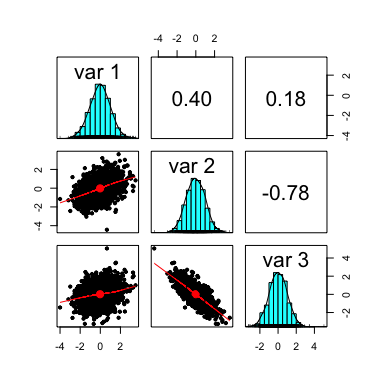

In [ ]:
m <- 3
n <- 2000
sigma <- matrix(c(1,0.4,0.2,0.4,1,-0.8,0.2,-0.8,1), nrow=3, ncol=3)
X <- mvrnorm(n,mu=rep(0,m),Sigma=sigma)
pairs.panels(X,method="spearman")

On crée ensuite un vecteur Z constitué des fonctions de répartition des
éléments de X. On constate que la corrélation de Spearman entre les
éléments de Z ne change pas. Celà s’explique par le fait que nous
appliquons une fonction croissante à chaque élément de X. Cependant, la
distribution de Z est différente de celle de X. En effet, les
composantes de Z suivent une loi uniforme $\mathcal{U}(0,1)$.

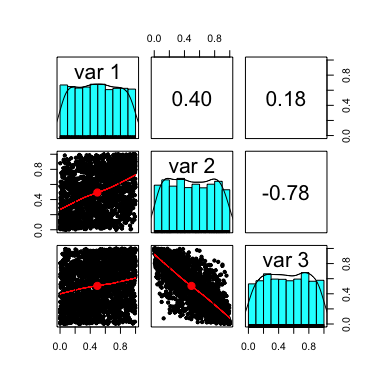

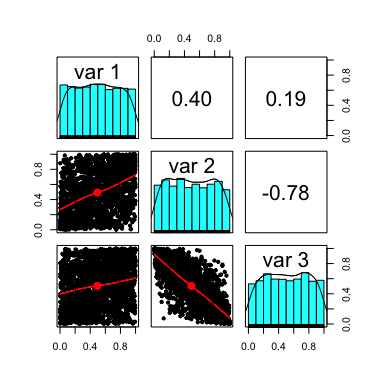

In [ ]:
Z <- pnorm(X, 0,1)
par(mfrow=c(1,2))
pairs.panels(Z,method="spearman")

A partir de Z, nous construisons un vecteur W tel que les composantes de
W suivent des lois marginales différentes, resp
$\beta(0,1), \gamma(2,1), \beta(2,1)$. La corrélation de Spearman entre
les éléments de W ne change pas bien que la distribution des marginales
ait changé, puisque nous appliquons une fonction croissante à chaque
élément de Z.

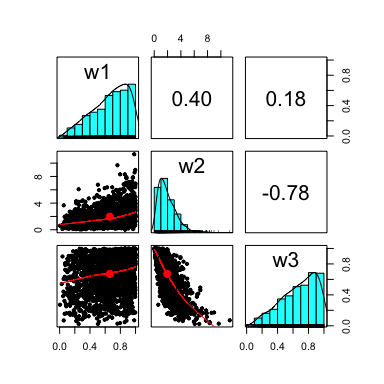

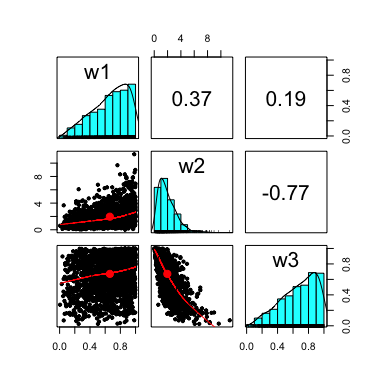

In [ ]:
w1 <- qbeta(Z[,1], 2, 1)
w2 <- qgamma(Z[,2], 2, 1)
w3 <- qbeta(Z[,3], 2,1)
W <- cbind(w1,w2,w3)

par(mfrow=c(1,2))
pairs.panels(W,method="spearman")

On en conclut que la structure de dépendance d’un vecteur de variables
aléatoire peut être isolée, caractériséee, et modélisée indépendamment
des lois marginales/distributions univariées des composantes du vecteur
aléatoire. Le concept de copule permet de modéliser cette structure de
dépendance.

Si l’on utilise la correlation de Pearson, on constate que la
corrélation entre les éléments de W et Z change. En effet, la
corrélation de Pearson est une mesure de corrélation linéaire et ne
permet pas de comparer, xdans tous les cas, les dépendances entre les
variables aléatoires.

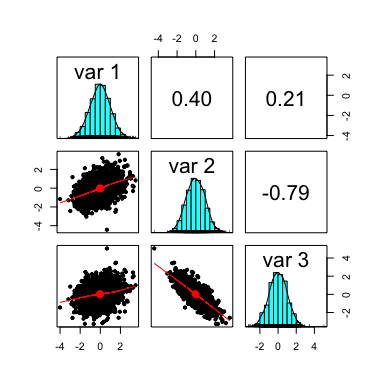

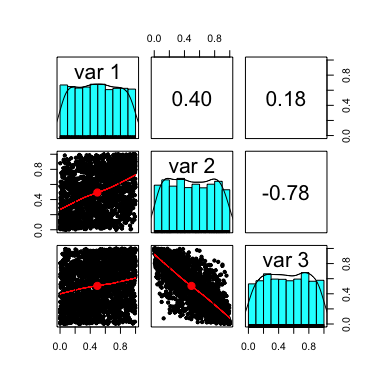

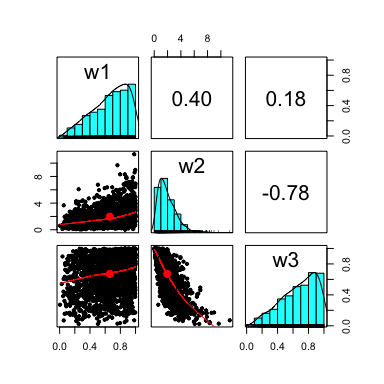

In [ ]:
pairs.panels(X,method="pearson")